# Data Aqusition

In [ ]:
#testbed

# Data Preprocess and Analysis

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#  Load dataset 
three classes for MOS value; 
poor (1) = 1 - 2 ;
average (2) = 2 - 3 ;
good (3)= 3- 5 ;

In [12]:
data = pd.read_csv('/media/loop/Backup/experiment/New/Final_conventional.csv')

def class_l(x):

    if(x['MOS']>=1 and x['MOS']<2):
        return '1'  # poor
    if(x['MOS']>=2 and x['MOS']<3 ):
        return '2' # average
    if(x['MOS']>=3 and x['MOS']<5 ):
        return '3' # good
    
data=data.assign(mos=data.apply(class_l, axis=1)) 

data.head(5)


,Type,Mobility,Operator,Trace,Total host,Client,Algorithm,Port,Segment,RTT,Throughput,Packets,MOS,Stall Duration,Rep_level,Byte Size,Buffer level,Width,Height,mos
0,3g,metro,Am,1.0,1,1,conv,58428,1,0.014,22659.514093,183,1.878,0,237,361713,10000,320,180,1
1,3g,metro,Am,1.0,1,1,conv,58432,2,59.723,8985.608897,219,1.878,0,237,348932,20000,320,180,1
2,3g,metro,Am,1.0,1,1,conv,58436,3,0.015,22692.006057,135,1.878,0,237,232527,17928,320,180,1
3,3g,metro,Am,1.0,1,1,conv,58440,4,328.707,65282.761561,148,1.886,0,237,347702,19861,320,180,1
4,3g,metro,Am,1.0,1,1,conv,58444,5,140.111,85331.063518,98,1.886,0,237,236167,25988,320,180,1


In [13]:
data=data.dropna() #drop entire row due to missing value

(3591, 20)


3    2046
2     968
1     577
Name: mos, dtype: int64

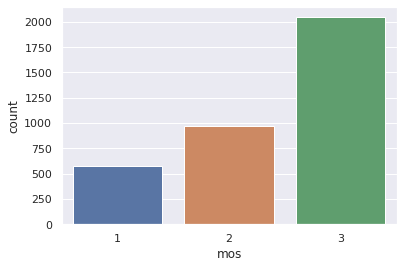

In [14]:
data['mos'].value_counts()
sns.set(style="darkgrid")
p = sns.countplot(data=data, x = 'mos')
print(data.shape)
data['mos'].value_counts()

# Select features (X) and target (y)

In [15]:
feature=data.loc[:,data.columns.isin(['RTT','Throughput','Packets'])]#3
#X=X1.iloc[0:1725]
target=data.loc[:,data.columns.isin(['mos'])]#3
target.columns= ['mos']
#y=y1.iloc[0:1725]
#y=y1.iloc[0:1725]

# To make our dataset balanced there are two ways to do so:
Under-sampling: Remove samples from over-represented classes ; use this if you have huge dataset
Over-sampling: Add more samples from under-represented classes; use this if you have small dataset
SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is an over-sampling method. It creates synthetic samples of the minority class. We use imblearn python package to over-sample the minority classes .

(6138, 3) (6138, 1)


2    2046
3    2046
1    2046
Name: mos, dtype: int64

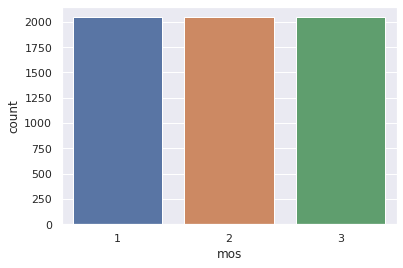

In [17]:
feature.shape
target.shape
smote=SMOTE(random_state=42) # resample all class same
X, y=smote.fit_resample(feature,target)
print(X.shape, y.shape)

sns.set(style="darkgrid")
sns.countplot(data=y, x = 'mos')
y['mos'].value_counts()

# Split dataset into training and testing

In [18]:
X_train, X_test,y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [ ]:
%run ./grid_search.ipynb

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:    1.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.3s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 52.0min


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', best_estimator[0])) #LogisticRegression()
models.append(('KNN',best_estimator[1])) #KNeighborsClassifier()))
models.append(('DTC',best_estimator[2])) #DecisionTreeClassifier()))
models.append(('GNB',best_estimator[3])) #GaussianNB()))
models.append(('SVM',best_estimator[4])) # SVC()))
models.append(('RFC',best_estimator[5])) #RandomForestClassifier)))
models.append(('MLP',best_estimator[6])) #MLPClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
model= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scores = model_selection.cross_validate(model, X_train, y_train.values.ravel(), cv=kfold, return_train_score=True)
print('Train scores:')
print(scores['train_score'])
print('Test scores:')
print(scores['test_score'])

In [ ]:

svc_model = RandomForestClassifier()
svc_model.fit(X_train,y_train)
pred = svc_model.predict(X_test)
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, pred)

print ("Accuracy of our RF classification  model is : {0:.4f}".format(accuracy))


# Random Forest Clasification
using gridseach select optimal parameter

In [ ]:
#!/usr/bin/env python -W ignore::DeprecationWarning 

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 3, 10, 50, 90, 100],
    'max_features': [3],
    'n_estimators': [100, 200,500],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'class_weight': ['balanced',None]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,  cv = 10, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_
print('Mean test score: {}'.format(grid_search.cv_results_['mean_test_score']))
print('Mean train score: {}'.format(grid_search.cv_results_['mean_train_score']))


In [ ]:
#!/usr/bin/env python -W ignore::DeprecationWarning 

# Create the parameter grid based on the results of random search 
param_gri=[]

param_grid[0] = {
    'bootstrap': [True],
    'max_depth': [ 3, 10, 50, 90, 100],
    'max_features': [3],
    'n_estimators': [100, 200,500],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'class_weight': ['balanced',None]
}


param_grid[1] = {
    'bootstrap': [True],
    'max_depth': [ 3, 10,],
    'max_features': [3],
    'n_estimators': [100, 200],
    'min_samples_leaf': [3, 4, ],
    'min_samples_split': [8, 10 ],
    #'class_weight': ['balanced',None]
}

models = []
models.append((LogisticRegression()))
models.append((KNeighborsClassifier()))
models.append((DecisionTreeClassifier()))
models.append((GaussianNB()))
models.append((SVC()))
models.append(( RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)))
models.append((MLPClassifier()))


# Create a based model
for i in 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,  cv = 10, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_
print('Mean test score: {}'.format(grid_search.cv_results_['mean_test_score']))
print('Mean train score: {}'.format(grid_search.cv_results_['mean_train_score']))



In [ ]:
dic=[]

param_grid= {
    'bootstrap': [True],
    'max_depth': [ 3, 10, 50, 90, 100],
    'max_features': [3],
    'n_estimators': [100, 200,500],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'class_weight': ['balanced',None]
}


param_grid[1] = {
    'bootstrap': [True],
    'max_depth': [ 3, 10,],
    'max_features': [3],
    'n_estimators': [100, 200],
    'min_samples_leaf': [3, 4, ],
    'min_samples_split': [8, 10 ],
    #'class_weight': ['balanced',None]
}

param_grid[0] 

In [ ]:
grid_search.best_score_
#grid_search.cv_results_['params'][grid_search.best_index_]

In [ ]:
grid_search.best_params_
grid_search.cv_results_['mean_train_score'].mean()
type(grid_search.best_estimator_)


In [ ]:
best_grid = grid_search.best_estimator_ 

xxx=best_grid.fit(X_train, y_train.values.ravel())
y_pred = best_grid.predict(X_test)
print ("Confusion Matrix")



# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred,labels=['1','2','3'])))
#print(y_test['mos'].value_counts())

accuracy = metrics.accuracy_score(y_test, y_pred)

print ("Accuracy of our RF classification  model is : {0:.4f}".format(accuracy))

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred,labels=['1','2','3'])))